In [ ]:
#Imports Needed
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras.preprocessing import sequence
from keras import regularizers
from keras.optimizers import Adam

In [ ]:
# Load the dataset including all words
(X_train, y_train), (X_test, y_test) = imdb.load_data()

# Truncate and pad input sequences
max_review_length = 1000
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Create the RNN model
embedding_vecor_length = 32
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=np.max(np.concatenate((X_train, X_test))) + 1,output_dim=embedding_vecor_length, input_length=max_review_length))
model_rnn.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_rnn.add(MaxPooling1D(pool_size=2))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.3))
model_rnn.add(LSTM(50, dropout=0.3))
model_rnn.add(BatchNormalization())
model_rnn.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
optimizer = Adam(learning_rate=0.0001)
model_rnn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
print(model_rnn.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 32)          2834784   
                                                                 
 conv1d (Conv1D)             (None, 1000, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 500, 32)           0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 500, 32)           128       
 Normalization)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 500, 32)           0         
                                                                 
 lstm_4 (LSTM)               (None, 50)               

In [ ]:
# Train the model
history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 54s 126ms/step - loss: 0.7479 - accuracy: 0.5372 - val_loss: 0.6988 - val_accuracy: 0.6008
Epoch 2/10
391/391 [==============================] - 36s 93ms/step - loss: 0.6358 - accuracy: 0.6513 - val_loss: 0.5173 - val_accuracy: 0.7577
Epoch 3/10
391/391 [==============================] - 29s 73ms/step - loss: 0.4179 - accuracy: 0.8212 - val_loss: 0.4854 - val_accuracy: 0.8224
Epoch 4/10
391/391 [==============================] - 26s 66ms/step - loss: 0.2910 - accuracy: 0.8886 - val_loss: 0.4958 - val_accuracy: 0.8378
Epoch 5/10
391/391 [==============================] - 22s 56ms/step - loss: 0.2146 - accuracy: 0.9240 - val_loss: 0.5153 - val_accuracy: 0.8446
Epoch 6/10
391/391 [==============================] - 20s 51ms/step - loss: 0.1679 - accuracy: 0.9439 - val_loss: 0.4994 - val_accuracy: 0.8581
Epoch 7/10
391/391 [==============================] - 22s 55ms/step - loss: 0.1306 - accuracy: 0.9596 - val_loss: 0.6035 - val_accuracy

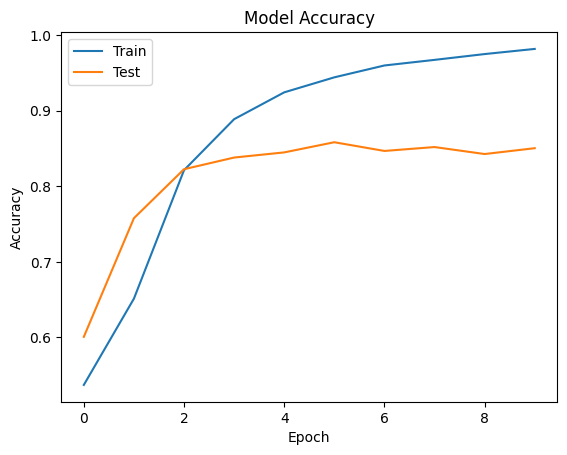

In [ ]:
# Plot training accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Predictions
y_pred = model_rnn.predict(X_test)

782/782 [==============================] - 6s 7ms/step


In [ ]:
# Samples of predicted vs. actual labels
num_samples = 5
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

print("Samples of Predicted vs Actual Labels")
for i in sample_indices:
    review = [index for index in X_test[i] if index != 0]
    if len(review) > 0:
        review_text = " ".join([str(index) for index in review])
        actual_label = "Positive" if y_test[i] == 1 else "Negative"
        predicted_label = "Positive" if y_pred[i] > 0.5 else "Negative"
        print("Review:", review_text)
        print("Actual Label:", actual_label)
        print("Predicted Label:", predicted_label)
        print("---------------------------")

Samples of Predicted vs Actual Labels
Review: 1 351 132 1286 9 6 22 24 44 4 341 8812 21 44 4 84 574 11 6 341 8812 420 4 455 4 2166 625 362 71 556 4 7402 37 461 27 3580 29631 5 51 571 12 716 4 65 19 117 20831 21 6 176 7 5054 5 8358 13 28 12 23 288 5 175 58 13 106 12 24 400 45 115 35 776 22 8 106 146 53 1555 34 51 1756 5663 5 4 436 177 122 133 38 3656 15 12 100 30 6 664 38 1444 25 191 193 129 523 245 38 1302 5 246 38 976 351 132 1286 9 164 346 7 6 991 12 152 551 726 335 18 42 429 4 341 8812 42 60 28 57 652 14 20 80 28 25 536 44 4 1341 18 252 12 304 6 8224 2979 5 167 8 168 14 819 11 4 393 209 43970 60 280 5 316 574 11 4 22 2649 12 125 50 218 6 686 136 15 2666 2556 6 4796 22 21 92 535 641 829 8 49 4 477 139 100 30 53 2177 74 233 5381 60 151 57 541 42 567 9 617 25 79 1309 83 14 22 5 413 6 16188 5 225 6 109 18 43 44 316 8 3468 19 158 158
Actual Label: Positive
Predicted Label: Positive
---------------------------
Review: 1 39 10 10 4 807 9 394 373 3572 116 338 111 114 1508 13 92 386 14 33 32